# __Activity 4__
## Rachel Nana, December 2018 - January 2019

__Importing Packages__

In [1]:
import pandas as pd
import sklearn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

__Importing Telco Data__

In [2]:
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv');
telco.drop('customerID', axis=1, inplace=True)

__Data Prep__

Variables

In [3]:
X = telco.loc[:, telco.columns != 'Churn'].copy()
y = telco.loc[:, 'Churn'].copy()

Split The Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
X_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


In [6]:
y_train[:5]

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
Name: Churn, dtype: object

In [7]:
X_train.shape

(5634, 19)

In [8]:
sum(X_train['TotalCharges'].eq(' '))

10

In [9]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [10]:
# test if value is number
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [11]:
def ReplaceBlanks(X):
    for column in X:
        # count number of values that are not numbers
        num_count = 0
        non_num_count = 0
        non_nums = []
        
        for index, item in X[column].iteritems():
            if is_number(item) == True:
                num_count += 1
            else:
                non_num_count += 1
                non_nums.append(item)
        
        non_nums = set(non_nums)
        
        # if mostly numeric, replace ' ' and '' with NaN and convert to numeric
        if non_num_count/(num_count+non_num_count) <=0.1:
            X[column].replace(" ", np.nan, inplace=True)
            X[column].replace("", np.nan, inplace=True)
            X[column] = pd.to_numeric(X[column])
    return X

In [12]:
def ScaleNumerics(X):
    # get numeric fields
    num_cols = X.select_dtypes(include=[np.number]).copy()
    
    # use min and max of a column to scale numeric column
    for column in num_cols:
        min_val = min(X[column])
        max_val = max(X[column])
        rng = (max_val - min_val)
        col_normalized = X[column].add(-rng/2).divide(rng/2)
        X.drop(column, axis=1, inplace=True)
        X = pd.concat([X, col_normalized], axis=1)
    return X

In [13]:
def CreateDummies(X):
    # get non-numeric fields
    non_num_cols = X.select_dtypes(exclude=[np.number]).copy()
    
    # replace 'No phone service' and 'No internet service' with 'No'
    non_num_cols.replace("No phone service", "No", inplace=True)
    non_num_cols.replace("No internet service", "No", inplace=True)
    
    # get dummies
    for column in non_num_cols:
        new_cols = pd.get_dummies(non_num_cols[column], prefix=column, drop_first=True)
        X.drop(column, axis=1, inplace=True)
        X = pd.concat([X, new_cols], axis=1)
    return X

In [14]:
#X_train = CreateDummies(X_train)
#y_train = pd.get_dummies(y_train, prefix='Churn', drop_first=True)

In [15]:
def TelcoPreprocessing(X,y):
    # X
    # replace blanks
    ReplaceBlanks(X)
    # scale numeric colums
    X = ScaleNumerics(X)
    # get dummies
    X = CreateDummies(X)
    
    # y
    # get dummies
    y = pd.get_dummies(y, prefix='Churn', drop_first=True)
    return (X,y)

In [16]:
(X_train, y_train) = TelcoPreprocessing(X_train, y_train)
(X_test, y_test) = TelcoPreprocessing(X_test, y_test)

C:\Users\rfowl\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\rfowl\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rfowl\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import FunctionTransformer

In [18]:
#pipe1 = Pipeline([('pre', FunctionTransformer(TelcoPreprocessing))])

In [19]:
#pipe1.fit(X_train, y_train)

In [20]:
#test = pipe1.transform(X_train)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [22]:
RandForest = RandomForestClassifier()
SimpleImputer = SimpleImputer()

In [23]:
pipe = Pipeline([('SI', SimpleImputer), 
                 ('RF', RandForest)])

In [24]:
pipe.set_params(SI__missing_values=np.nan, SI__strategy="median",
                RF__criterion="gini", RF__max_depth=9, RF__n_estimators=200)

Pipeline(memory=None,
     steps=[('SI', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

train model

In [25]:
pipe.fit(X_train, y_train)

C:\Users\rfowl\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
     steps=[('SI', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

predictions

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score, log_loss
from matplotlib import pyplot as plt

In [27]:
predictions = pipe.predict(X_test)
pred_prob = pipe.predict_proba(X_test)
roc_score = roc_auc_score(y_test, pred_prob[:,1])
#log_loss = log_loss(y_test, pred_prob[:,1], eps=1e-15)
print("ROC Score: {}".format(roc_score))
#print("Log Loss: {}".format(log_loss))

ROC Score: 0.8657822414524827


In [28]:
pipe.score(X_test, y_test)

0.8069552874378992

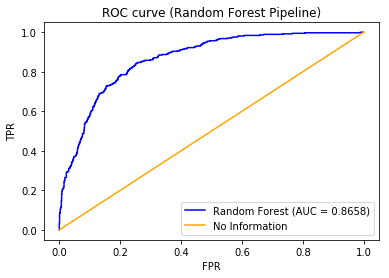

In [29]:
f = plt.figure()
fpr, tpr, _ = roc_curve(y_test, pred_prob[:,1])
plt.plot(fpr, tpr, color='blue', label='Random Forest (AUC = %0.4f)' % roc_score)
plt.plot([0,1],[0,1], color = 'orange', label = 'No Information')
plt.legend(loc="lower right")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (Random Forest Pipeline)')
plt.show()

f.savefig("ROC_curve_RF_Pipe.pdf", bbox_inches='tight')